# Ejemplos de perceptrón y regresión logística


Perceptrón en la compuerta AND

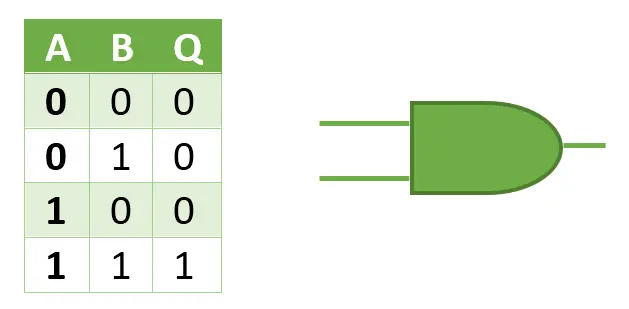

In [1]:
import numpy as np

class Perceptron(object):
  """ Perceptron
  Parameters
  ------------
  eta: float
    Learning rate (0.0 < eta < 1.0)
  n_iter: int
    Number or iteration over the training set
  random_state: int
    Random number generator seed for weight initalization

  Attributes
  ------------
  w_ : 1d_array
    Weights after fitting
  errors_ : list
    Number of misclassifications (updates) in each epoch
  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """ Fit training data
    Parameters
    ------------
    X : {np.array}, shape = [n_samples, m_features]
      Training vectors with n_samples samples and m_features features
    y : {np.array}, shape = [n_samples]
      Target values
    """
    rgen = np.random.RandomState(self.random_state)
    if self.random_state is None:
      self.w_= np.zeros(1 + len(X[1]))
    else:
      self.w_= rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
    self.errors_ = []
    #print(self.w_)
    for _ in range(self.n_iter):
      errors = 0
      for xi, yi in zip(X, y):
        update = self.eta * (yi - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        #print("xi : ",xi)
        #print("up : ",update)
        #print("pesos : ",self.w_)
        errors += int(update != 0.0)
      self.errors_.append(errors)
      #print('pesos ',self.w_)
    return self

  def net_input(self, X):
    """Calculate cell input"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    """Return class label after unit step"""
    #print(X)
    #print("dot "+str(self.net_input(X)))
    #print("pred "+str(np.where(self.net_input(X) >= 0.0, 1, -1)))
    return np.where(self.net_input(X) >= 0.0, 1, -1)


In [2]:
# Función para graficar
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    colors = np.array(['lime', 'red', 'blue'])
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # Superficies de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # Conjuntos de cada clase
    plt.scatter(X[:,0],
                X[:,1],
                alpha=0.9,
                c=colors[y],
                edgecolor='black',)


In [3]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])
#print(X, X.shape[1])
#print(y)

ppn = Perceptron(n_iter=20, eta=0.85)
ppn.fit(X, y)
print('Pesos: %s' % ppn.w_)


Pesos: [-1.68375655  1.69388244  1.69471828]


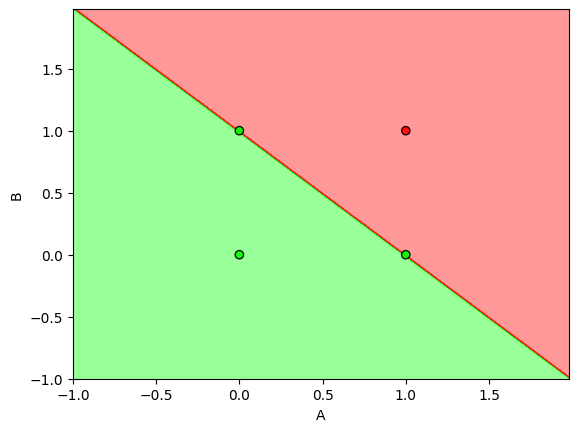

In [4]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('A')
plt.ylabel('B')
#plt.legend(loc='upper left')
plt.show()

# Ejemplo con Iris



In [5]:
# Iris Dataset
import pandas as pd
# https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
df = pd.read_csv('https://bit.ly/38XWXS4', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: xlabel='4', ylabel='Count'>

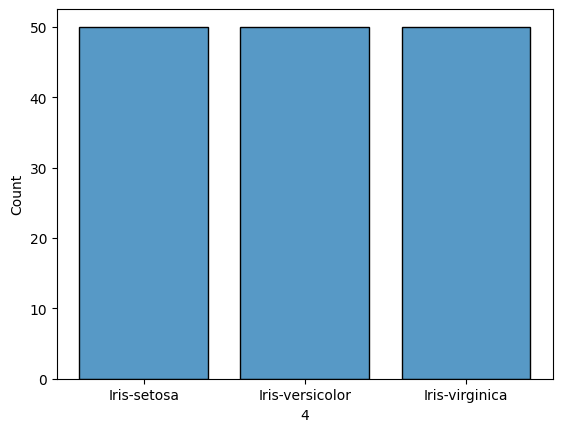

In [6]:
import seaborn as sns
sns.histplot(x = df[4], shrink= 0.8)

In [7]:
df.iloc[:,4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
# sepal length & petal length
X = df.iloc[0:100, [0,2]].values
# Iris-setosa & Iris-versicolor
y = df.iloc[0:100, 4].values
y = np.array(np.where(y == 'Iris-setosa', -1, 1))
print(type(y))
y

<class 'numpy.ndarray'>


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

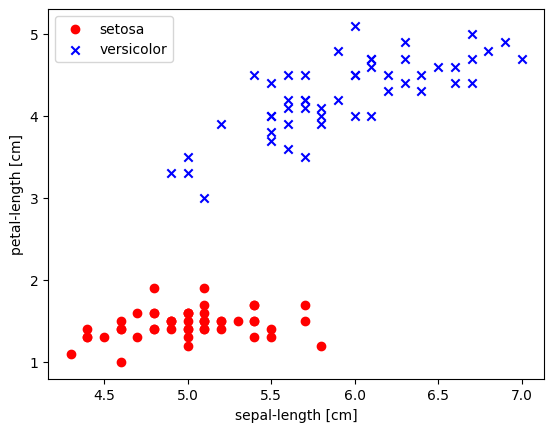

<class 'numpy.ndarray'>


In [9]:
#Se grsfican las muestras
import matplotlib.pyplot as plt

plt.scatter(X[:50, 0],X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0],X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal-length [cm]')
plt.ylabel('petal-length [cm]')
plt.legend(loc='upper left')
plt.show()
print(type(y))

Se entrena el perceptrón y se grafican las clasificaciones erroneas en cada época

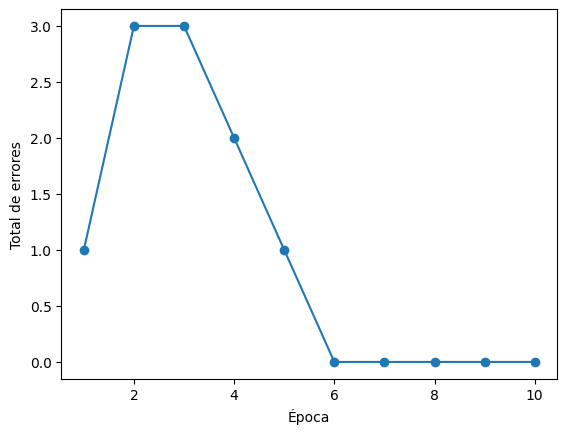

<class 'numpy.ndarray'>


In [10]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Época')
plt.ylabel('Total de errores')
plt.show()
print(type(y))

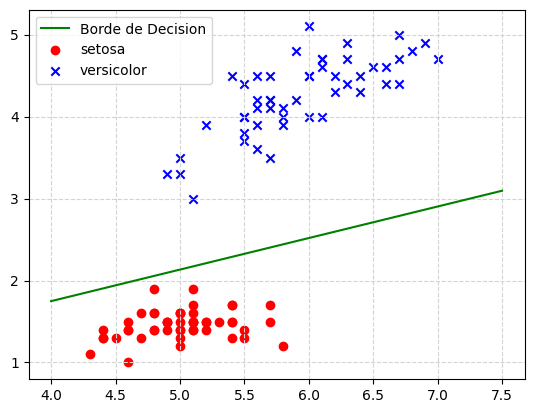

In [11]:
# w0 + w1*x1 + w2*x2
# => x2 = -(w0 + w1*x1) / w2
# Borde de decision
x1 = np.linspace(4, 7.5, 2)
x2 = - (ppn.w_[0]+ppn.w_[1]*x1) / ppn.w_[2]
plt.plot(x1, x2, 'g', label = "Borde de Decision")

# Clase -1 : setosa
registros = y == -1
x1 = X[registros][:, 0]
x2 = X[registros][:, 1]
plt.scatter(x1, x2, c='r', marker='o', label="setosa")
# Clase 1 : versicolor
registros = y == 1
x1 = X[registros][:, 0]
x2 = X[registros][:, 1]
plt.scatter(x1, x2, c='b', marker='x', label="versicolor")

plt.legend()
plt.grid(color = 'lightgray', linestyle = '--')

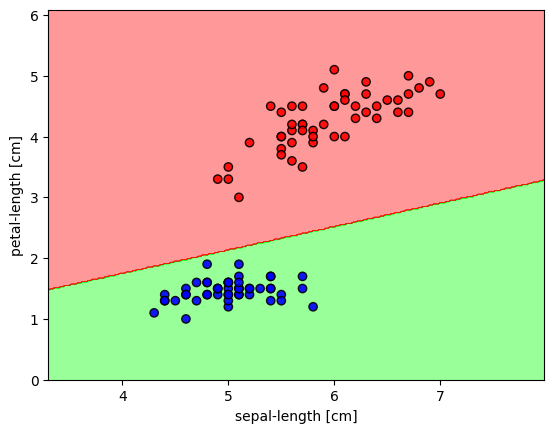

In [12]:
plot_decision_regions(X, y, classifier=ppn)#, resolution=2)
plt.xlabel('sepal-length [cm]')
plt.ylabel('petal-length [cm]')
#plt.legend(loc='upper left')
plt.show()

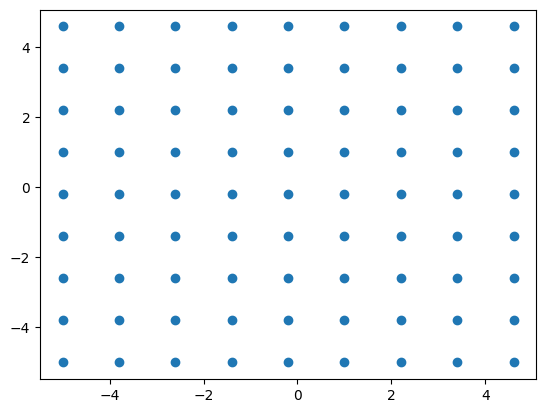

In [13]:
sp = 1.2

x = np.arange(-5, 5, sp)
y = np.arange(-5, 5, sp)
xx, yy = np.meshgrid(x, y)

plt.scatter(xx, yy)
plt.show()

# Ejemplo con información de ventas de celulares

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
df = pd.read_csv('train.csv')

In [16]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [18]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<Axes: xlabel='price_range', ylabel='count'>

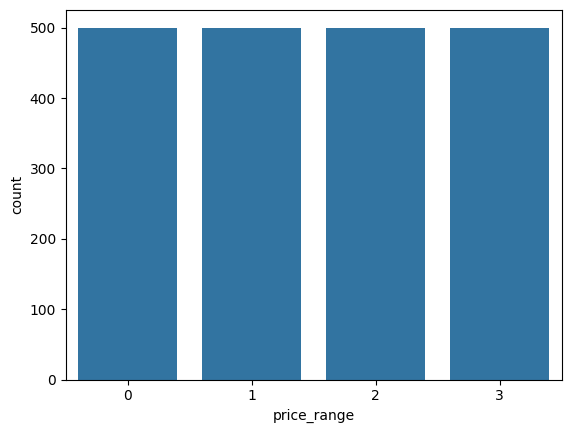

In [19]:
sns.countplot(x='price_range',data=df)

C:\Users\denis\AppData\Local\Temp\ipykernel_4568\2957001273.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['battery_power'].dropna(),kde=True)


<Axes: xlabel='battery_power', ylabel='Density'>

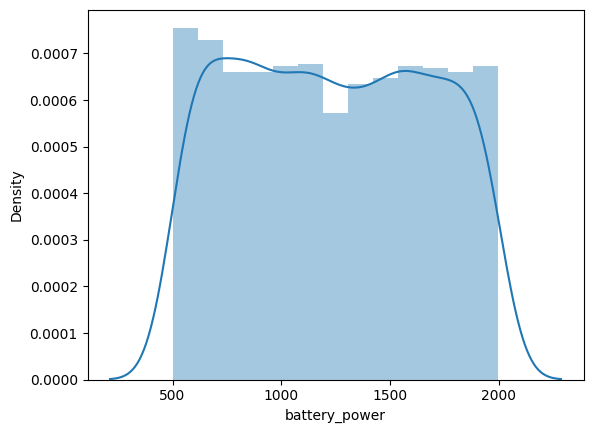

In [20]:
sns.distplot(df['battery_power'].dropna(),kde=True)

<Axes: >

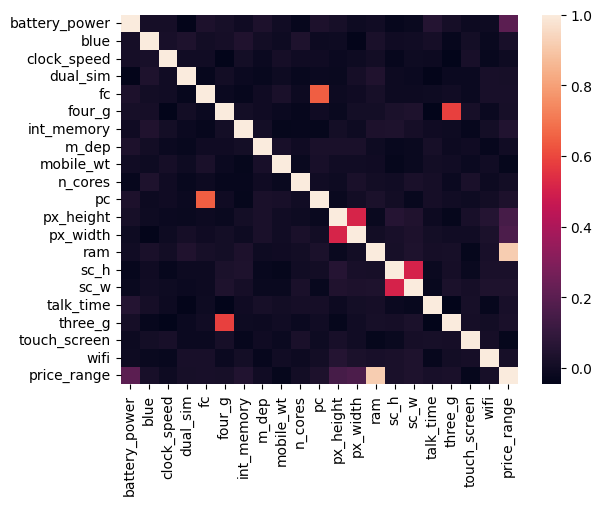

In [21]:
sns.heatmap(df.corr())

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
X = df.loc[:,['ram', 'battery_power']]#drop('price_range',axis=1)
y = np.array(df['price_range'])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1400, 2) (1400,)
(600, 2) (600,)


In [26]:
print('Total de etiquetas en y       :', np.bincount(y))
print('Total de etiquetas en y_train :', np.bincount(y_train))
print('Total de etiquetas en y_test  :', np.bincount(y_test))

Total de etiquetas en y       : [500 500 500 500]
Total de etiquetas en y_train : [350 350 350 350]
Total de etiquetas en y_test  : [150 150 150 150]


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print('Vemos las primeras 5')
print(X_train_std[:5])
print('Y las últimas 5')
print(X_train_std[-5:])

Vemos las primeras 5
[[-0.73269261 -1.07551865]
 [ 0.40582231  1.15248731]
 [ 1.68549833  0.52764224]
 [ 0.43626882 -0.71976744]
 [ 1.44469412  1.05214723]]
Y las últimas 5
[[-0.17358399  1.15476777]
 [-0.72254378 -0.33208984]
 [ 1.24356263  0.96320943]
 [-0.21325671 -0.847473  ]
 [ 1.16329456 -1.45179397]]


In [28]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=60, eta0=0.05, random_state=1)
#ppn = Perceptron(max_iter=40, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.05, max_iter=60, random_state=1)

In [29]:
y_pred = ppn.predict(X_test_std)
print('Errores de clasificación : ',(y_test-y_pred).sum())

Errores de clasificación :  31


In [30]:
ppn.coef_

array([[-0.33543239, -0.1455933 ],
       [-0.01918397, -0.09570799],
       [ 0.04489209, -0.01760235],
       [ 0.36783585,  0.04733332]])

In [31]:
print('Exactitud : ',ppn.score(X_test_std,y_test))

Exactitud :  0.7116666666666667


In [32]:
from sklearn.metrics import accuracy_score
print('Exactitud : ',accuracy_score(y_test,y_pred))

Exactitud :  0.7116666666666667


In [33]:
print(y_train.shape)
X_train_std.shape

(1400,)


(1400, 2)

In [34]:
print(y_test.shape)
X_test_std.shape

(600,)


(600, 2)

C:\Users\denis\AppData\Roaming\Python\Python312\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


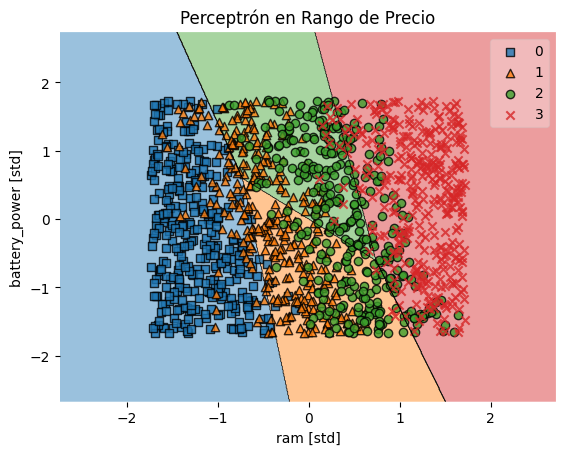

In [35]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Plotting decision regions
plot_decision_regions(X_train_std, y_train, clf=ppn)

# Adding axes annotations
plt.xlabel('ram [std]')
plt.ylabel('battery_power [std]')
plt.title('Perceptrón en Rango de Precio')
plt.show()

Regresión Logística

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=50.0, random_state=1) # C => inverso de la regularización
                                  # valor pequeño => reglurarización más fuerte
lr.fit(X_train_std, y_train)

LogisticRegression(C=50.0, random_state=1)

In [37]:
y_pred = lr.predict(X_test_std)
print('Errores de clasificación : ',(y_test-y_pred).sum())
print('Exactitud : ',lr.score(X_test_std,y_test))

Errores de clasificación :  28
Exactitud :  0.8433333333333334


C:\Users\denis\AppData\Roaming\Python\Python312\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


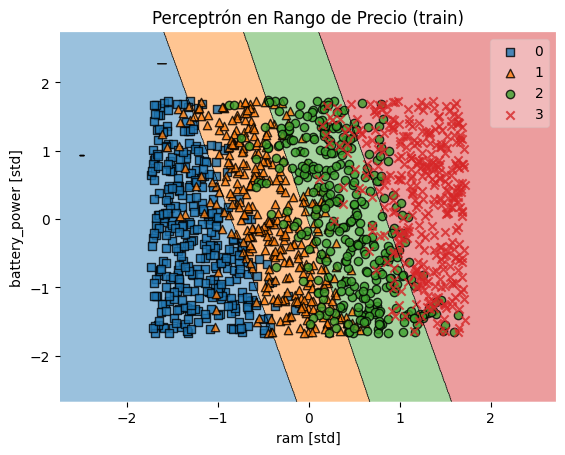

In [38]:
# Plotting decision regions
plot_decision_regions(X_train_std, y_train, clf=lr)

# Adding axes annotations
plt.xlabel('ram [std]')
plt.ylabel('battery_power [std]')
plt.title('Perceptrón en Rango de Precio (train)')
plt.show()

C:\Users\denis\AppData\Roaming\Python\Python312\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


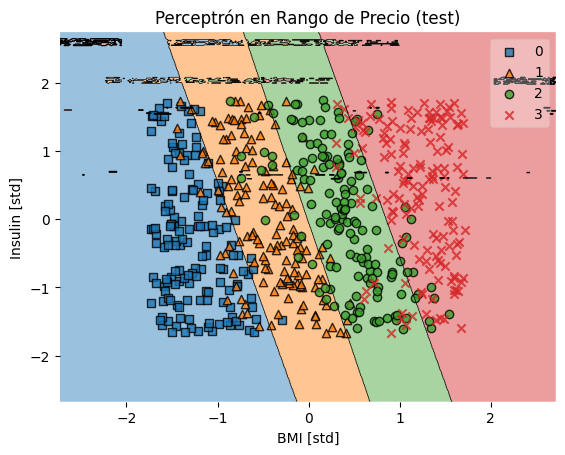

In [39]:
# Plotting decision regions
plot_decision_regions(X_test_std, y_test, clf=lr)

# Adding axes annotations
plt.xlabel('BMI [std]')
plt.ylabel('Insulin [std]')
plt.title('Perceptrón en Rango de Precio (test)')
plt.show()

--------------